In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('Train.csv')
print(f"df shape: {df.shape}")
print(f"columns: {df.columns}")

df shape: (8523, 12)
columns: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [45]:
miss = 'Outlet_Size'
df_0 = df.copy()[['Outlet_Identifier', 'Outlet_Establishment_Year', miss, 'Outlet_Location_Type', 'Outlet_Type']]\
    .drop_duplicates().sort_values(by=['Outlet_Identifier']).reset_index().drop(columns=['index'])
df_1 = df[['Outlet_Identifier', 'Item_Outlet_Sales']].groupby(by=['Outlet_Identifier']).sum(numeric_only=True).reset_index()
df_1['Item_Outlet_Sales'] = df_1['Item_Outlet_Sales']//1000
df_2 = df[['Outlet_Identifier', 'Item_Identifier']].groupby(by=['Outlet_Identifier']).count().reset_index()
df_final = df_0.merge(df_1,how='left',on='Outlet_Identifier').merge(df_2,how='left',on='Outlet_Identifier')
df_final

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier
0,OUT010,1998,NaN,Tier 3,Grocery Store,188.0,555
1,OUT013,1987,High,Tier 3,Supermarket Type1,2142.0,932
2,OUT017,2007,NaN,Tier 2,Supermarket Type1,2167.0,926
3,OUT018,2009,Medium,Tier 3,Supermarket Type2,1851.0,928
4,OUT019,1985,Small,Tier 1,Grocery Store,179.0,528
5,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.0,935
6,OUT035,2004,Small,Tier 2,Supermarket Type1,2268.0,930
7,OUT045,2002,NaN,Tier 2,Supermarket Type1,2036.0,929
8,OUT046,1997,Small,Tier 1,Supermarket Type1,2118.0,930
9,OUT049,1999,Medium,Tier 1,Supermarket Type1,2183.0,930


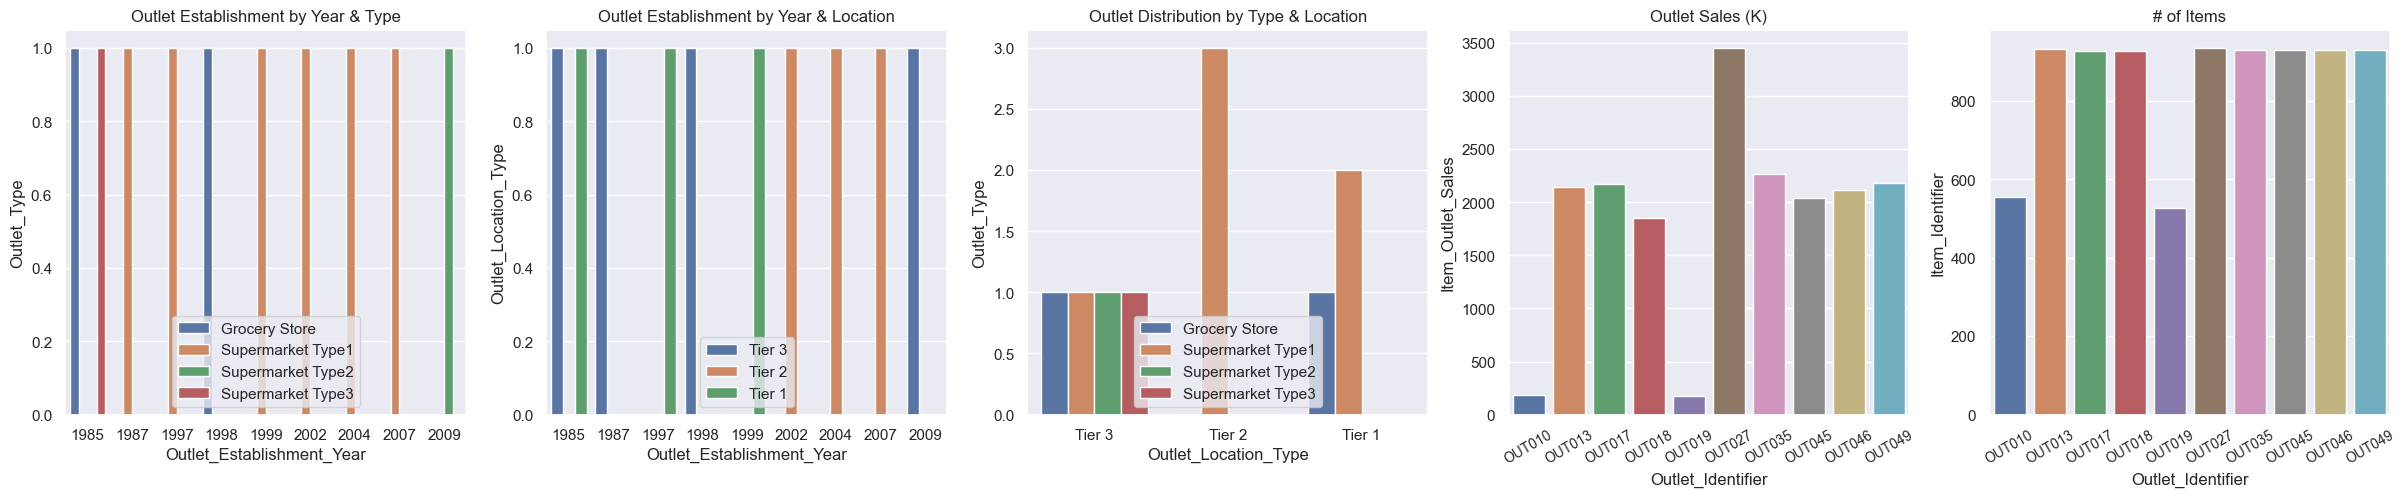

In [58]:
sns.set()
fig, axes= plt.subplots(1, 5, figsize=(30, 5))
ax, i = axes.flatten(), 0
temp = sns.countplot(data=df_final,x='Outlet_Establishment_Year',hue='Outlet_Type',ax=ax[i])
temp.set(xlabel=f"Outlet_Establishment_Year", ylabel='Outlet_Type', title=f"Outlet Establishment by Year & Type")
temp.legend(loc='lower center')
i += 1
temp = sns.countplot(data=df_final,x='Outlet_Establishment_Year',hue='Outlet_Location_Type',ax=ax[i])
temp.set(xlabel=f"Outlet_Establishment_Year", ylabel='Outlet_Location_Type', title=f"Outlet Establishment by Year & Location")
temp.legend(loc='lower center')
i += 1
temp = sns.countplot(data=df_final,x='Outlet_Location_Type',hue='Outlet_Type',ax=ax[i])
temp.set(xlabel=f"Outlet_Location_Type", ylabel='Outlet_Type', title=f"Outlet Distribution by Type & Location")
temp.legend(loc='lower center')
i += 1
temp = sns.barplot(data=df_final,x='Outlet_Identifier',y='Item_Outlet_Sales',ax=ax[i])
temp.set(xlabel=f"Outlet_Identifier", ylabel='Item_Outlet_Sales', title=f"Outlet Sales (K)")
temp.set_xticklabels(temp.get_xticklabels(), rotation=30, fontsize=10)
i += 1
temp = sns.barplot(data=df_final,x='Outlet_Identifier',y='Item_Identifier',ax=ax[i])
temp.set(xlabel=f"Outlet_Identifier", ylabel='Item_Identifier', title=f"# of Items")
temp.set_xticklabels(temp.get_xticklabels(), rotation=30, fontsize=10)
i += 1

In [20]:
df_0 = df.copy()
miss, key, key_new = 'Item_Weight', 'Item_Identifier', 'Item_No'
identifier_cnt_0, identifier_cnt_1, identifier_unique = getattr(df, key).unique(), getattr(df[getattr(df, miss).isna()==False], key).unique(), []
for id in identifier_cnt_0:
    if id not in identifier_cnt_1:
        identifier_unique.append(id)
df_0[key_new] = pd.factorize(getattr(df,key))[0]
grouped = pd.DataFrame(df_0.groupby(key_new)[miss].nunique().reset_index())
test = grouped.merge(df_0[df_0['Item_Weight'].isna()==False][['Item_Identifier', 'Item_No', 'Item_Weight']].drop_duplicates(), how='left', on='Item_No')
test

,Item_No,Item_Weight_x,Item_Identifier,Item_Weight_y
0,0,1,FDA15,9.300
1,1,1,DRC01,5.920
2,2,1,FDN15,17.500
3,3,1,FDX07,19.200
4,4,1,NCD19,8.930
...,...,...,...,...
1554,1554,1,FDD28,10.695
1555,1555,1,FDU43,19.350
1556,1556,1,NCF55,6.675
1557,1557,1,NCW30,5.210


In [19]:
test[test['Item_Weight_y'].isna() == True]

,Item_No,Item_Weight_x,Item_Identifier,Item_Weight_y
711,711,0,NaN,NaN
1130,1130,0,NaN,NaN
1494,1494,0,NaN,NaN
1539,1539,0,NaN,NaN


In [18]:
miss, key, key_new = 'Item_Visibility', 'Item_Identifier', 'Item_No'
df_0 = df[[miss, key]]
identifier_cnt_0, identifier_cnt_1, identifier_unique = getattr(df, key).unique(), getattr(df[getattr(df, miss)!=0], key).unique(), []
for id in identifier_cnt_0:
    if id not in identifier_cnt_1:
        identifier_unique.append(id)
df_0 = df_0[getattr(df, miss)!=0].sort_values(by=[miss,key])
df_0[key_new] = pd.factorize(getattr(df_0,key))[0]
# df_0 = df_0[getattr(df, miss)!=0]
avg = df_0.groupby(by=[key, key_new]).mean().reset_index().rename(columns={miss:'mean'})
med = df_0.groupby(by=[key, key_new]).median().reset_index().rename(columns={miss:'median'})
maxi = df_0.groupby(by=[key, key_new]).max().reset_index().rename(columns={miss:'max'})
mini = df_0.groupby(by=[key, key_new]).min().reset_index().rename(columns={miss:'min'})
final = avg.merge(med,how='left',on=[key, key_new]).merge(maxi,how='left',on=[key, key_new]).merge(mini,how='left',on=[key, key_new])
final = final.sort_values(by=key_new).reset_index()
final

,index,Item_Identifier,Item_No,mean,median,max,min
0,129,DRM59,0,0.003981,0.003599,0.006289,0.003575
1,573,FDK51,1,0.005740,0.005235,0.008763,0.005210
2,910,FDS52,2,0.006454,0.005491,0.009585,0.005448
3,328,FDE20,3,0.005537,0.005531,0.005562,0.005526
4,970,FDU04,4,0.006940,0.005557,0.009715,0.005547
...,...,...,...,...,...,...,...
1554,917,FDT01,1554,0.184593,0.184498,0.185209,0.184168
1555,936,FDT24,1555,0.206937,0.186192,0.311090,0.185705
1556,1552,NCZ18,1556,0.209585,0.186401,0.325781,0.186033
1557,977,FDU13,1557,0.208029,0.187939,0.328391,0.187523


<AxesSubplot: xlabel='Item_No', ylabel='mean'>

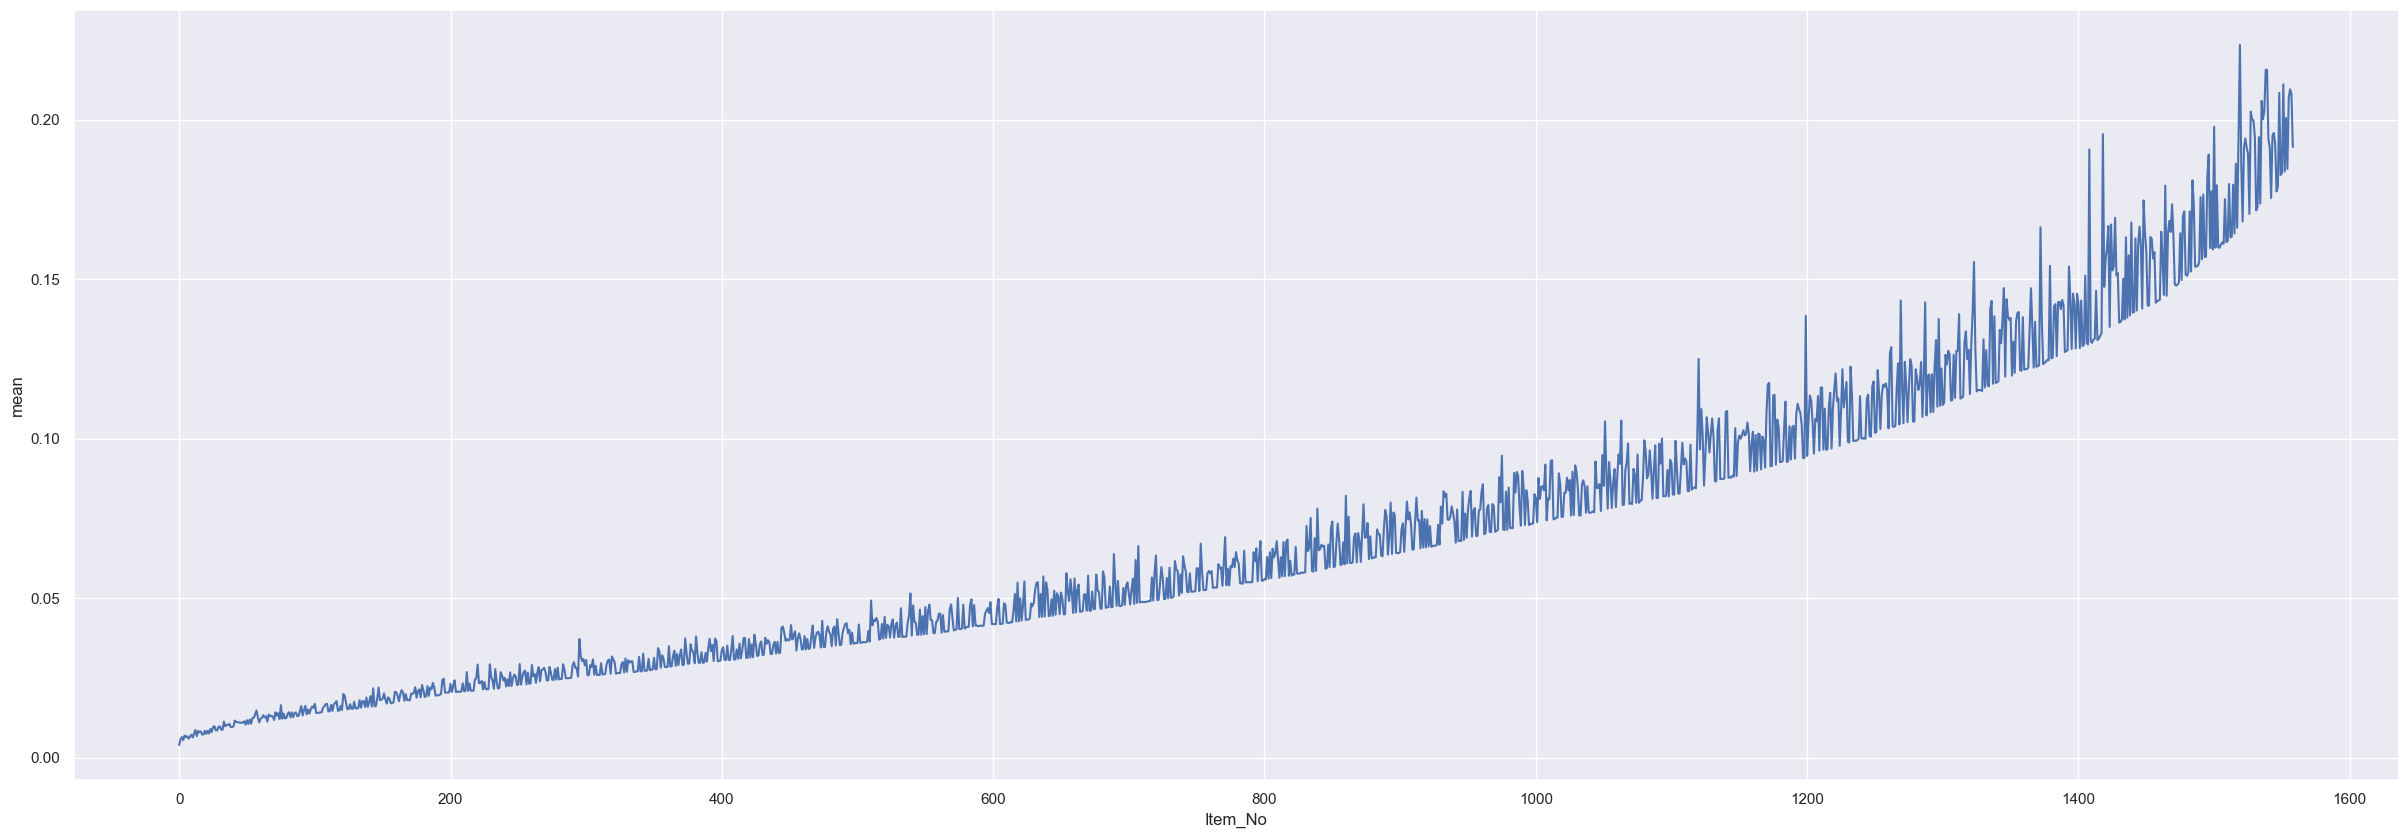

In [21]:
plt.figure(figsize=(30,10))
sns.set()
sns.lineplot(data=final,x=key_new,y='mean')
# sns.lineplot(data=final[['mean','median','max','min']])
# plt.savefig('visibility.png')

<AxesSubplot: xlabel='Item_No', ylabel='max'>

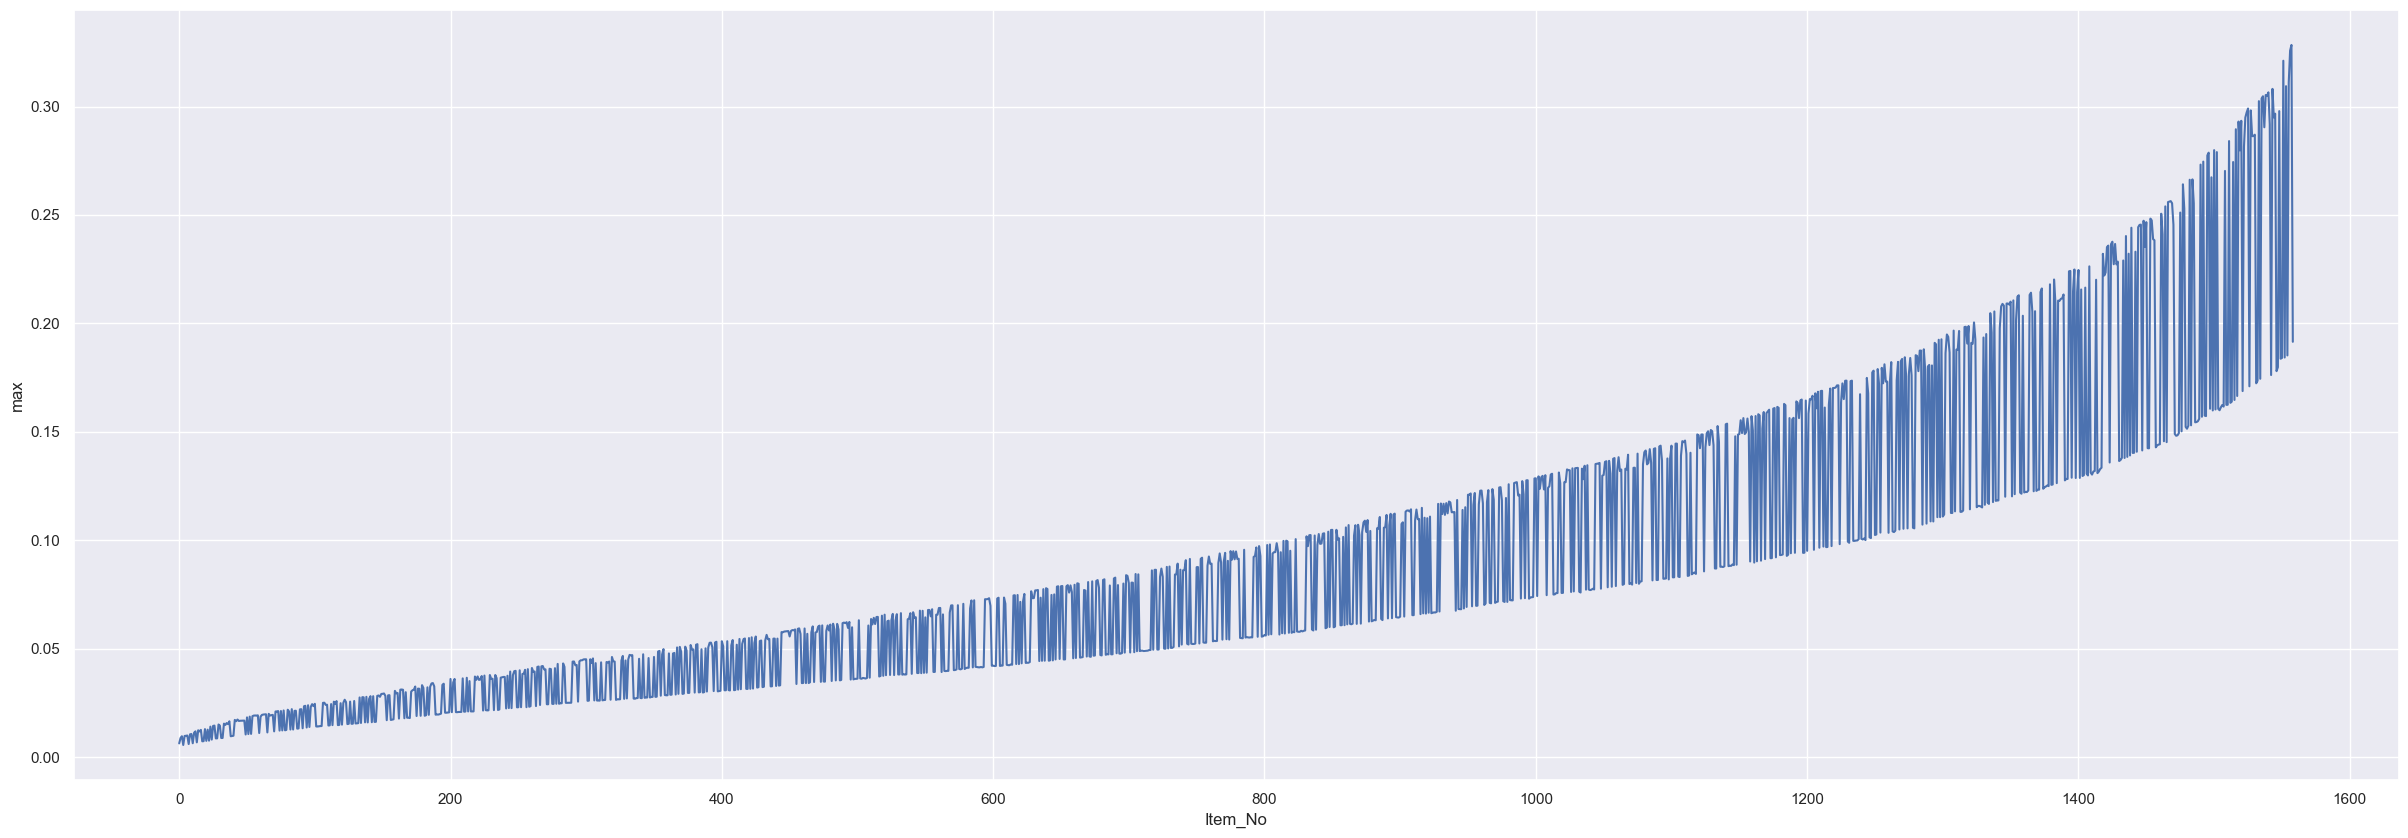

In [24]:
plt.figure(figsize=(30,10))
sns.set()
sns.lineplot(data=final,x=key_new,y='max')

In [8]:
from pandasql import sqldf
from sqlalchemy import text
query = text("select distinct * from mini")
res = sqldf(query)

# pysqldf = lambda q: sqldf(q, globals())
# df_sql = pysqldf("""
# select distinct * from mini
# """)

TypeError: expected string or bytes-like object, got 'TextClause'